# 一般市民_満足度

In [2]:
import pandas as pd
import csv
from pprint import pprint
import MeCab
import regex
import re
from collections import Counter

In [3]:
df = pd.read_csv("../subject/people.csv")

In [4]:
df = pd.read_csv("../subject/people.csv")
#問14
#df["問14\n理由"]
df14 = df.iloc[:,16:17].dropna(how='all')
# df14 = df.iloc[:,16:17]
df14

,問14\n理由
0,ずっと舞鶴に住みたい、住んでみたいと思えるさまざまな制度、イベント、スポットをこれからも提来...
1,医療体制が整ってる
2,居住している場所が大変便利がよいため。
3,交通の便をもう少しよくしてほしい（鉄道）（白鳥街道）
4,子育て世代として、［学校が荒れずに落ち着いているのが安心。（でも東高は心配。）医療費負担が少...
...,...
1077,良い所と悪い所が半々ある。交通が不便である。物価が高いが味はいい品がある。
1078,まだまだ知らないことが多いので今後満足度があかっていくとう期待をこめて。
1079,子育てしやすい感じがする
1083,イオンがない


In [4]:
#問16
df16 = df.iloc[:,18:19].dropna(how='all')
df16

,問16
0,赤レンガパックだけでなく、商店街が活性化、人が集まるイベントを企画してほしいです。（シャッタ...
1,交流人口増加によるまちの活性
2,人にやさしい町
3,年老いても住みやすい街
4,・子育て世代と介護が必要な世代にやさしいまち
...,...
1076,だれにとっても居心地の良いまち
1078,ハード面では最新技術など利用して便利に、ソフト面では人と人とが通い共助できるようなまち
1079,居心地がいい街
1083,都会


In [5]:
import MeCab
import regex

class IndependentWord:
    def __init__(self):
        self.m = MeCab.Tagger("-d /usr/local/mecab/lib/mecab/dic/mecab-ipadic-neologd/")
#         self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}\p{Script=Katakana}ーA-Za-z]')
        self.kanaalpha = regex.compile(r'[\p{Script=Hiragana}ーA-Za-z]+')
        self.number = regex.compile('[0-9０-９]+')

    class Constant:
        BASIC = "basic_form" #原型
        SURFACE = "surface_form" #表層型
        POS = "pos" #品詞
        POS_DETAIL_1 = "pos_detail_1" #品詞詳細1
        POS_DETAIL_2 = "pos_detail_2" #品詞詳細2
        POS_DETAIL_3 = "pos_detail_3" #品詞詳細3
        PRONUNCIATION = "pronunciation" #発音
        READING = "reading" #読み
        CONJUGATED_TYPE = "conjugated_type" #活用
        CONJUGATED_FORM = "conjugated_form" #活用形

  #mecabの出力行をobjectに変換
  #mecabの出力フォーマットに応じて適宜修正する
    def mecabLineToDict(self, line):
        surface, tmp = line.split("\t")
        others = tmp.split(",")
    
        Const = self.Constant

        return {
            Const.SURFACE: surface,
            Const.POS: others[0],
            Const.POS_DETAIL_1: others[1],
            Const.POS_DETAIL_2: others[2],
            Const.POS_DETAIL_3: others[3],
            Const.CONJUGATED_TYPE: others[4],
            Const.CONJUGATED_FORM: others[5],
            Const.BASIC: others[6],
            Const.READING: others[7],
            Const.PRONUNCIATION: others[8]
        }
#自立語かどうかの判定
    def isIndependentWord(self, token):
        pos = token[self.Constant.POS]
        pos_detail_1 = token[self.Constant.POS_DETAIL_1]
        if pos == "名詞" and pos_detail_1 in ['一般','固有名詞','サ変接続','形容動詞語幹']: #用途によっては「副詞可能」を足しても良いかもしれません
            return True
        elif pos == '形容詞' and pos_detail_1 == '自立':
            return True
        elif pos == "副詞" and pos_detail_1 == "一般":
            return True
        elif pos == "動詞" and pos_detail_1 == "自立":
            return True
        else:
            return False
        
  #カナやアルファベット１文字や数字出ないかの判定
    def isReliableWord(self, token):
        surface = token[self.Constant.SURFACE]
        if self.number.fullmatch(surface):
            return False
        elif self.kanaalpha.fullmatch(surface):
            return False
        else:
            return True

  #自立語の原型を抽出
    def extract(self,text):
        lines = self.m.parse(text).splitlines()[:-1]
        tokens = [self.mecabLineToDict(line) for line in lines]

        independent_words = []
        for token in tokens:
            if self.isIndependentWord(token) and self.isReliableWord(token):
#             if self.isIndependentWord(token):
                surface = token[self.Constant.SURFACE]
                basic = token[self.Constant.BASIC]
                if basic == "*":
                    independent_words.append(surface)
                else:
                    independent_words.append(basic)
        return independent_words

In [7]:
df["問14\n理由"].tolist()

['ずっと舞鶴に住みたい、住んでみたいと思えるさまざまな制度、イベント、スポットをこれからも提来・発信お願いします。',
 '医療体制が整ってる',
 '居住している場所が大変便利がよいため。',
 '交通の便をもう少しよくしてほしい（鉄道）（白鳥街道）',
 '子育て世代として、［学校が荒れずに落ち着いているのが安心。（でも東高は心配。）医療費負担が少ない（月に200円の制度）のはとてもありがたい。\u3000車がないと不便、観光地へのアクセスが不便、赤れんが倉庫群は、横没の赤レンガ倉庫と比較するととても見劣りするのが残念。総合病院に救急でかかるとき、たらいまわしになるときがある。福祉関係の施設に入所するのに、とても待たされ、費用も高く利用しづらいイメージ。',
 '愛着もあるし努力もしている。しかし大規模事業所撤退、北陸新幹線の延伸もない。やっぱり何か足りない。',
 'コロナ禍であるのに、ゴミの有料化等、もう少し市民に寄りそってほしい',
 'もっと必要なところをたくさん作ってほしい。',
 '子供の未来が心配…',
 '街中への施策を増やしてほしい。\u3000街中にもっと住みやすい施設やお店がほしい。',
 '遊ぶ所が少ないー10％都会から遠いー10％買い物する場所が少ないー10％',
 '住みやすい。',
 '子どものための学ぶ場が少ないのが気になる。アメリカンスクールとか…あったら…',
 '住んでいてここちよい。人も概ね良いし、食べ物も美味しい\u3000まちの基礎力も高いので、方向性をまちがえなければもっと良いまちになる。',
 '公共料金が高い。交通の便が悪い。',
 '自然も多く、ゆったりとした感じは良いが、商店街など街の活気がなく、交通の便も悪い。',
 '地元に残って暮らしていきたいと思える魅力に乏しい。',
 '生活するうえで必要な施設や病院が備のっているから',
 nan,
 '食べ物はおいしいが、公共交通機関が不便なため',
 '公共交通機関の利便性に欠ける',
 '子育てする前は市との接点などなかったけど、子どもが生まれていろんなサポート体制が整っていると知った。ありがたかった。',
 '静かな街だから',
 '大体良いがもう少し医療が充実してほしい',
 '良い所を活かしきれていない。',
 nan,
 '生まれ育ったまちなので'

In [18]:
list = []
# .replace('','')

for i in df14["問14\n理由"]:
    i = re.sub('[0-9.,０-９．，]|[a-zA-Z]|%|~|〜|', '', i)
#     s = i.lstrip('・').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('TNR','').replace('ー10％','').replace('1H30min~2H','').replace('マイナス30％','').replace('100','').replace('20％','').replace('Society5.0やSDFGs','').replace('R27','')
    s = i.lstrip('・').replace('パーツ','').replace('シャッター','').replace('デコボコ','').replace('ドンキーホーテ','').replace('ブックオフ','').replace('（','').replace('）','').replace('/','').replace('(','').replace(')','').replace('\u3000','').replace('Society5.0','').replace('R27','').replace('ー10％','').replace('1H30min~2H','').replace('~','').replace('-','').replace('%','').replace('･','').replace('!','').replace('ベビカー','').replace('～','').replace('キャンプ','').replace('イオン','')
    list.append(s)
# print(list)

# 実行
res = []
if __name__ == "__main__":
    for i in list:
        idptwd = IndependentWord()
        result = idptwd.extract(i)
        res.append(result)

# ストップワード
stop = ['街', 'まち', '町', '住む', '人', 'ひと', '舞鶴', '思う']
words = []

for i in res:
    for t in i:
        if t not in stop:
            words.append (t)


[('自然', 93),
 ('少ない', 92),
 ('良い', 67),
 ('交通', 57),
 ('多い', 52),
 ('豊か', 47),
 ('悪い', 41),
 ('生活', 38),
 ('不便', 37),
 ('店', 35),
 ('便', 34),
 ('施設', 28),
 ('海', 28),
 ('場所', 26),
 ('高い', 25),
 ('医療', 24),
 ('食べ物', 24),
 ('生まれる', 24),
 ('育つ', 24),
 ('充実', 22),
 ('子育て', 21),
 ('感じる', 21),
 ('車', 18),
 ('病院', 18),
 ('無い', 18),
 ('行く', 18),
 ('都会', 17),
 ('買い物', 17),
 ('発展', 17),
 ('若者', 17),
 ('田舎', 17),
 ('特に', 17),
 ('好き', 16),
 ('災害', 16),
 ('知る', 15),
 ('山', 15),
 ('魅力', 14),
 ('市', 13),
 ('静か', 13),
 ('満足', 13),
 ('不安', 13),
 ('福祉', 12),
 ('子供', 12),
 ('自分', 12),
 ('若い人', 12),
 ('体制', 11),
 ('バス', 11),
 ('増える', 11),
 ('魚', 11),
 ('遊べる', 11),
 ('他', 11),
 ('近い', 11),
 ('イベント', 10),
 ('便利', 10),
 ('美味しい', 10),
 ('暮らす', 10),
 ('優しい', 10),
 ('来る', 10),
 ('困る', 10),
 ('比べる', 10),
 ('環境', 10),
 ('道路', 10),
 ('働く', 10),
 ('安心', 9),
 ('市民', 9),
 ('活気', 9),
 ('企業', 9),
 ('力', 9),
 ('不満', 9),
 ('出る', 9),
 ('空気', 9),
 ('落ち着く', 8),
 ('遊ぶ', 8),
 ('整備', 8),
 ('期待', 8),
 ('仕事', 8),
 ('楽しい', 8),
 (

In [20]:
values, counts = zip(*mine.most_common())

In [21]:
values

('自然',
 '少ない',
 '良い',
 '交通',
 '多い',
 '豊か',
 '悪い',
 '生活',
 '不便',
 '店',
 '便',
 '施設',
 '海',
 '場所',
 '高い',
 '医療',
 '食べ物',
 '生まれる',
 '育つ',
 '充実',
 '子育て',
 '感じる',
 '車',
 '病院',
 '無い',
 '行く',
 '都会',
 '買い物',
 '発展',
 '若者',
 '田舎',
 '特に',
 '好き',
 '災害',
 '知る',
 '山',
 '魅力',
 '市',
 '静か',
 '満足',
 '不安',
 '福祉',
 '子供',
 '自分',
 '若い人',
 '体制',
 'バス',
 '増える',
 '魚',
 '遊べる',
 '他',
 '近い',
 'イベント',
 '便利',
 '美味しい',
 '暮らす',
 '優しい',
 '来る',
 '困る',
 '比べる',
 '環境',
 '道路',
 '働く',
 '安心',
 '市民',
 '活気',
 '企業',
 '力',
 '不満',
 '出る',
 '空気',
 '落ち着く',
 '遊ぶ',
 '整備',
 '期待',
 '仕事',
 '楽しい',
 '歴史',
 '京都',
 '年',
 'アクセス',
 '遠い',
 '子ども',
 '満足度',
 '大阪',
 '行ける',
 '人口',
 '入れる',
 '市外',
 '学校',
 '関係',
 '気',
 '出来る',
 '自然災害',
 '安い',
 '有名',
 '商業施設',
 '地域',
 '舞鶴市',
 '観光',
 '高齢',
 '医療費',
 '利用',
 '感じ',
 '商店街',
 '中途半端',
 '教育',
 '不足',
 'スポーツ',
 'スーパー',
 '場',
 '西',
 'マイナス',
 'チェーン店',
 '閉鎖',
 'レジャー施設',
 '移動',
 '可',
 '不可',
 '物価',
 '思える',
 '居住',
 '観光地',
 '残念',
 '愛着',
 'ゴミ',
 '必要',
 '作る',
 '施策',
 '神戸',
 '税金',
 '公共',
 '就職',
 '考える',
 '落ちつく',
 'アピール',
 '娯楽施設

In [22]:
counts

(93,
 92,
 67,
 57,
 52,
 47,
 41,
 38,
 37,
 35,
 34,
 28,
 28,
 26,
 25,
 24,
 24,
 24,
 24,
 22,
 21,
 21,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 15,
 15,
 14,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 

In [193]:
# # 以下メモ

# m = MeCab.Tagger("-Ochasen -d /usr/local/mecab/lib/mecab/dic/mecab-ipadic-neologd/")


# def parse_text(text: str):
#     parsed_text = m.parse(text).split('\n')
#     parsed_results = pd.Series(parsed_text).str.split('\t').tolist()
#     df = pd.DataFrame.from_records(parsed_results)
#     columns = ['surface', 'spell', 'orig', 'type', 'katsuyoukei', 'katsuyoukata']
#     df.columns = columns
#     return df.query("surface != 'EOS'").query("surface != ''")

# df = parse_text('イオン、ブックオフ、ドンキーホーテなどfg100の店が欲しい')




# len(res)

# # 確かめるやつ
# res = []
# if __name__ == "__main__":
#     idptwd = IndependentWord()
#     result = idptwd.extract('イベントは殆んど東地区に集中している.公共交通が不便で殆んど参加出来ない③西地区からも参加しやすい様に考えてほしい',
#  '良い所と悪い所が半々ある。交通が不便である。物価が高いが味はいい品がある。')
#     res.append(result)
# result

,surface,spell,orig,type,katsuyoukei,katsuyoukata
0,イオン,イオン,イオン,名詞-一般,,
1,、,、,、,記号-読点,,
2,ブックオフ,ブックオフ,BOOK OFF,名詞-固有名詞-一般,,
3,、,、,、,記号-読点,,
4,ドンキーホーテ,ドンキーホーテ,ドンキーホーテ,名詞-固有名詞-一般,,
5,など,ナド,など,助詞-副助詞,,
6,fg,fg,fg,名詞-一般,,
7,100,100,100,名詞-数,,
8,の,ノ,の,助詞-連体化,,
9,店,ミセ,店,名詞-一般,,


In [26]:
result = ' '.join(s for s in words)
result

'思える 制度 イベント スポット 提 発信 お願い 医療 体制 整う 居住 場所 大変 便利 交通 便 鉄道 白鳥 街道 子育て 世代 学校 荒れる 落ち着く 安心 東高 心配 医療費 負担 少ない 月 円 制度 車 不便 観光地 アクセス 不便 赤レンガ 倉庫 横 赤レンガ倉庫 比較 見劣り 残念 総合病院 救急 福祉 関係 施設 入所 待たす 費用 高い 利用 イメージ 愛着 努力 大規模 事業所 撤退 北陸新幹線 延伸 足りる コロナ禍 ゴミ 有料化 市民 寄る 必要 作る 子供 未来 心配 街中 施策 増やす 街中 施設 店 遊ぶ 少ない 都会 遠い 買い物 場所 少ない 子ども 学部 少ない 気 アメリカンスクール 概ね 良い 食べ物 美味しい 基礎力 高い 方向性 良い 公共料金 高い 交通 便 悪い 自然 多い 感じ 良い 商店街 活気 交通 便 悪い 地元 残る 暮らす 思える 魅力 乏しい 生活 必要 施設 病院 備 食べ物 公共交通機関 不便 公共交通機関 利便性 欠ける 子育て 市 接点 子ども 生まれる サポート 体制 整う 知る 静か 良い 医療 充実 良い 活かす 生まれる 育つ インフラ 整備 中途半端 感じる 東面 住 優しい 教育 文化施設 充実 期待 官民 連携 不充分 学校 企業 誘致 不足 民間 活力 導入 観光振興 充実 期待 良い 悪い 自然 生活 不便 無い 生まれる 育つ 満足度 上げる 意味 含める 都会 施設 残念 閉塞 発展 積極 神戸 大阪 京都市内 程よい 海山 人柄 良い 仕事 関係 来る 知る 店 店 少ない 発展 イベント 多い 楽しい 大手企業 誘致 生まれる 育つ 日常生活 困る 医療 教育 スポーツ 振興 スーパー 競 海 京 大阪 速い 行ける 飲食店 多い 自分 郷里 生まれ故郷 税金 市 比べる 高い 子供 医療費 高い 産業 若者 人口 流出 市長 無駄 医療 力 入れる 車 運転 交通 自然 豊か 好き 公共 施設 土日 祝 使用 出来る サークル活動 安心 災害 少ない 住民税 高い 働く女性 優しい 社会 経済的 不満 少ない 単価 低い 子供 育てる 市 満足 伸びる 店 皆様 仕事 生活 感謝 若い人 引き留める 魅力 働き 稼げる 場 無い 不安 市長 満足度 目標 具体 案

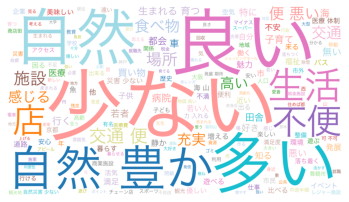

In [48]:
#ワードクラウドの作成
from matplotlib import pyplot as plt
from wordcloud import WordCloud
 
# w = WordCloud(background_color="white", width=600, height=400, min_font_size=15)

wc = WordCloud(
        font_path = "~/Library/Fonts/ヒラギノ角ゴシック W3.ttc",
        width=1920, 
        height=1080,
        prefer_horizontal=1,
        background_color='white',
        include_numbers=True,
        colormap='tab20',
        regexp=r"[\w']+",
    ).generate_from_text(result)

# plt.title('gen_14')
plt.imshow(wc)
plt.axis("off")
plt.show()
wc.to_file('./gen_14.png')

In [40]:
# 頻出単語を出力
mine = Counter(words)
for i in mine.most_common():
    print(i)

# values, counts = zip(*mine.most_common())
# values
# counts

('自然', 93)
('少ない', 92)
('良い', 67)
('交通', 57)
('多い', 52)
('豊か', 47)
('悪い', 41)
('生活', 38)
('不便', 37)
('店', 35)
('便', 34)
('施設', 28)
('海', 28)
('場所', 26)
('高い', 25)
('医療', 24)
('食べ物', 24)
('生まれる', 24)
('育つ', 24)
('充実', 22)
('子育て', 21)
('感じる', 21)
('車', 18)
('病院', 18)
('無い', 18)
('行く', 18)
('都会', 17)
('買い物', 17)
('発展', 17)
('若者', 17)
('田舎', 17)
('特に', 17)
('好き', 16)
('災害', 16)
('知る', 15)
('山', 15)
('魅力', 14)
('市', 13)
('静か', 13)
('満足', 13)
('不安', 13)
('福祉', 12)
('子供', 12)
('自分', 12)
('若い人', 12)
('体制', 11)
('バス', 11)
('増える', 11)
('魚', 11)
('遊べる', 11)
('他', 11)
('近い', 11)
('イベント', 10)
('便利', 10)
('美味しい', 10)
('暮らす', 10)
('優しい', 10)
('来る', 10)
('困る', 10)
('比べる', 10)
('環境', 10)
('道路', 10)
('働く', 10)
('安心', 9)
('市民', 9)
('活気', 9)
('企業', 9)
('力', 9)
('不満', 9)
('出る', 9)
('空気', 9)
('落ち着く', 8)
('遊ぶ', 8)
('整備', 8)
('期待', 8)
('仕事', 8)
('楽しい', 8)
('歴史', 8)
('京都', 8)
('年', 8)
('アクセス', 7)
('遠い', 7)
('子ども', 7)
('満足度', 7)
('大阪', 7)
('行ける', 7)
('人口', 7)
('入れる', 7)
('市外', 7)
('学校', 6)
('関係', 6)
('気', 6)
('

In [49]:
len(words)

3145